# Anomaly Detection Model
>  Includes the anomaly detection algorithm, i.e. the prediction model, the loss functions and the anomaly score calculation and classification, as well as the metric computation.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Only-Control-flow" data-toc-modified-id="Only-Control-flow-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Only Control-flow</a></span><ul class="toc-item"><li><span><a href="#Load-Log" data-toc-modified-id="Load-Log-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Log</a></span></li><li><span><a href="#Create-PPObj-with-vocab-and-dataloaders" data-toc-modified-id="Create-PPObj-with-vocab-and-dataloaders-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Create PPObj with vocab and dataloaders</a></span></li><li><span><a href="#Define-Deep-Learning-Model" data-toc-modified-id="Define-Deep-Learning-Model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Define Deep Learning Model</a></span></li><li><span><a href="#Define-Training-Loop-and-Helper-Functions" data-toc-modified-id="Define-Training-Loop-and-Helper-Functions-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Define Training Loop and Helper Functions</a></span></li><li><span><a href="#Train-prediction-model" data-toc-modified-id="Train-prediction-model-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Train prediction model</a></span></li><li><span><a href="#Load-Test-Data" data-toc-modified-id="Load-Test-Data-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Load Test Data</a></span></li><li><span><a href="#Create-PPOBJ-of-test-data-with-same-vocab" data-toc-modified-id="Create-PPOBJ-of-test-data-with-same-vocab-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Create PPOBJ of test data with same vocab</a></span></li><li><span><a href="#Apply-Prediction-Model" data-toc-modified-id="Apply-Prediction-Model-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Apply Prediction Model</a></span></li><li><span><a href="#Calculate-Anomaly-Score" data-toc-modified-id="Calculate-Anomaly-Score-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Calculate Anomaly Score</a></span></li><li><span><a href="#Classify-Anomalies-based-of-Threshhold,-get-predictions-and-ground-truth,-compute-a-few-metrics" data-toc-modified-id="Classify-Anomalies-based-of-Threshhold,-get-predictions-and-ground-truth,-compute-a-few-metrics-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Classify Anomalies based of Threshhold, get predictions and ground truth, compute a few metrics</a></span></li><li><span><a href="#Get-NSP-Accuracy-on-Inrference" data-toc-modified-id="Get-NSP-Accuracy-on-Inrference-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Get NSP Accuracy on Inrference</a></span></li></ul></li><li><span><a href="#Multivariate-Anomaly-Detection" data-toc-modified-id="Multivariate-Anomaly-Detection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Multivariate Anomaly Detection</a></span><ul class="toc-item"><li><span><a href="#Load-Event-Log:" data-toc-modified-id="Load-Event-Log:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load Event Log:</a></span></li><li><span><a href="#Create-Training-Data-Loaders-and-Vocab:" data-toc-modified-id="Create-Training-Data-Loaders-and-Vocab:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Create Training Data Loaders and Vocab:</a></span></li><li><span><a href="#Create-Multivariate-Prediction-Model" data-toc-modified-id="Create-Multivariate-Prediction-Model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Create Multivariate Prediction Model</a></span></li><li><span><a href="#Define-Multi-Loss-and--Metrics" data-toc-modified-id="Define-Multi-Loss-and--Metrics-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Define Multi-Loss and -Metrics</a></span></li><li><span><a href="#Training-of-the-prediction-network" data-toc-modified-id="Training-of-the-prediction-network-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Training of the prediction network</a></span></li><li><span><a href="#Load-Test-Log-for-Inference" data-toc-modified-id="Load-Test-Log-for-Inference-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Load Test Log for Inference</a></span></li><li><span><a href="#Compute-Anomaly-Score" data-toc-modified-id="Compute-Anomaly-Score-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Compute Anomaly Score</a></span></li><li><span><a href="#Anomaly-Classification" data-toc-modified-id="Anomaly-Classification-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Anomaly Classification</a></span></li></ul></li><li><span><a href="#Plot-Anomaly-Scores-for-a-Trace" data-toc-modified-id="Plot-Anomaly-Scores-for-a-Trace-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot Anomaly Scores for a Trace</a></span></li></ul></div>

In [114]:
#default_exp anomaly

In [115]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
#export

from dapnn.imports import *
from dapnn.data_processing import *

In [117]:
#export
import warnings
warnings.filterwarnings(action='once')

In [118]:
#notebook2script(fname='03_anomaly.ipynb')

## Only Control-flow 

### Load Log

In [119]:
log_name='pdc_2020_0101100'

In [120]:
log = import_log(f'data/csv/PDC2020_training/{log_name}.csv.gz')
log.head(20)

,activity,trace_id,event_id
trace_id,,,
trace 1,###start###,trace 1,0
trace 1,t31,trace 1,1
trace 1,t41,trace 1,2
trace 1,t26,trace 1,3
trace 1,t36,trace 1,4
trace 1,t44,trace 1,5
trace 1,t54,trace 1,6
trace 1,t33,trace 1,7
trace 1,t23,trace 1,8


### Create PPObj with vocab and dataloaders

In [121]:
#export
def training_dl(log,cat_names='activity',seed=45,ws=5,bs=32):
    categorify=Categorify()

    o=PPObj(log,procs=categorify,cat_names=cat_names,y_names=cat_names,splits=split_traces(log,test_seed=seed,validation_seed=seed))
    dls=o.get_dls(windows=partial(windows_fast,ws=ws),bs=bs)
    return o,dls,categorify



In [122]:
o,dls,categorify = training_dl(log)

print(dls)

# **Playing With the Data**

In [123]:
subsets = o.subsets()
item = subsets[0].items #df of categorical data - can only be used for categorical data and only the ones here!!

print(o)

           activity   trace_id event_id
trace_id                               
trace 665         2  trace 665        0
trace 665         6  trace 665        1
trace 665        11  trace 665        2
trace 665         3  trace 665        3
trace 665        14  trace 665        4
...             ...        ...      ...
trace 145        11  trace 145       48
trace 145        14  trace 145       49
trace 145        16  trace 145       50
trace 145        21  trace 145       51
trace 145         1  trace 145       52

[27725 rows x 3 columns]


### Define Deep Learning Model

In [124]:
x,y= dls.one_batch() # y is the 
print(f'{x.shape=}\n{y[0].shape=}')
print(f'{x=}\n{y=}')

x.shape=torch.Size([32, 1, 5])
y[0].shape=torch.Size([32])
x=tensor([[[25, 20, 18, 23, 10]],

        [[ 0,  2,  7, 13, 15]],

        [[15, 14, 18, 16, 22]],

        [[24, 25, 19, 20, 16]],

        [[16, 21, 26, 25, 20]],

        [[ 0,  0,  2,  3,  6]],

        [[ 3,  7, 13,  9,  4]],

        [[ 0,  0,  0,  2,  6]],

        [[ 6, 11, 14, 16, 21]],

        [[ 0,  0,  2,  6, 14]],

        [[13, 10,  9,  4,  5]],

        [[ 0,  0,  2,  6, 12]],

        [[ 5,  6, 12, 15, 14]],

        [[23, 10,  5,  6, 14]],

        [[ 8, 13, 15, 17, 23]],

        [[15, 26, 25, 20, 23]],

        [[21, 25,  9,  4, 20]],

        [[ 0,  0,  0,  0,  2]],

        [[14, 16,  3, 22,  7]],

        [[ 2,  3,  8, 13,  6]],

        [[21, 17, 23, 24, 26]],

        [[11, 14, 16, 22, 26]],

        [[13,  9,  4,  8, 13]],

        [[ 9,  4, 25, 20,  7]],

        [[14, 23, 24, 19, 10]],

        [[23, 24, 19, 15, 18]],

        [[23, 24, 19, 15, 18]],

        [[ 8, 13, 15, 17, 23]],

        [[ 7, 1

In [125]:
class ControlFlowModel(torch.nn.Module) :
    def __init__(self, o) :
        super().__init__()
        hidden=25
        vocab_act=len(o.procs.categorify['activity'])
        emb_dim_act = int(np.sqrt(vocab_act))+1

        self.emb_act = nn.Embedding(vocab_act,emb_dim_act)
        
        self.lstm_act = nn.LSTM(emb_dim_act, hidden, batch_first=True, num_layers=2)

        self.linear_act = nn.Linear(hidden, vocab_act)

    def forward(self, xcat):
        xcat=xcat[:,0]
        x_act=xcat
        x_act = self.emb_act(x_act)
        x_act,_ = self.lstm_act(x_act)
        x_act = x_act[:,-1]
        x_act = self.linear_act(x_act)
        return x_act

In [126]:
m=ControlFlowModel(o)


In [127]:
pred=m(x.cpu())

In [128]:
print(pred)

tensor([[-7.7289e-02,  4.1502e-03,  1.8284e-01, -5.4572e-02,  1.4530e-01,
         -4.1214e-02,  6.0720e-02,  2.3622e-01,  6.9587e-02, -1.4191e-01,
          8.4673e-02, -7.5379e-02,  1.3796e-01,  4.1135e-02, -1.1154e-02,
          1.7936e-01, -1.8099e-01, -6.2807e-02, -2.5838e-01, -1.2423e-01,
         -8.3654e-02,  2.0422e-01,  1.1883e-01, -7.6157e-02,  4.3436e-02,
          1.4779e-01, -2.0308e-01],
        [-8.4565e-02, -1.3245e-02,  1.8362e-01, -4.7921e-02,  1.5424e-01,
         -5.2286e-02,  7.8264e-02,  2.3286e-01,  9.5533e-02, -1.2866e-01,
          9.7001e-02, -8.0014e-02,  1.3272e-01,  5.7540e-02, -2.3903e-02,
          1.8676e-01, -1.9411e-01, -7.1479e-02, -2.7617e-01, -1.1593e-01,
         -9.4375e-02,  2.0435e-01,  1.2343e-01, -8.5889e-02,  4.0644e-02,
          1.6064e-01, -2.0396e-01],
        [-7.6561e-02, -7.6406e-05,  1.8300e-01, -4.3341e-02,  1.6111e-01,
         -4.7029e-02,  7.1274e-02,  2.5069e-01,  8.1959e-02, -1.2308e-01,
          9.1897e-02, -7.5076e-02,  1.26

In [129]:
y[0].cpu()

tensor([ 5,  6, 23, 21, 10,  7,  7,  7, 26,  3,  7, 14, 18, 16, 24, 16,  3,  3,
        13, 12, 19,  1,  9, 13,  5, 23, 23,  1, 18, 13, 10, 12])

In [130]:
squeeze_cross_entropy = lambda x,y:F.cross_entropy(x,y[0])
squeeze_accuracy =lambda x,y:accuracy(x,y[0])


In [131]:
squeeze_cross_entropy(pred.cuda(),y),squeeze_accuracy(pred.cuda(),y)

(tensor(3.3167, device='cuda:0', grad_fn=<NllLossBackward>),
 TensorBase(0.1250, device='cuda:0'))

### Define Training Loop and Helper Functions

In [132]:
#export
class HideOutput:
    'A utility function that hides all outputs in a context'
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [133]:
#export
def training_loop(learn,epoch,print_output,lr_find,fixed_learning_rate=0.01):
    '''
    Basic training loop that uses learning rate finder and one cycle training. 
    See fastai docs for more information
    '''
    if lr_find:
        lr=np.median([learn.lr_find(show_plot=print_output)[0] for i in range(5)])
        learn.fit_one_cycle(epoch,float(lr))
    else: learn.fit(epoch,fixed_learning_rate)

In [134]:
#export
def train_validate(dls,m,metrics=accuracy,loss=F.cross_entropy,epoch=20,print_output=True,model_dir=".",lr_find=True,
                   patience=5,min_delta=0.005,show_plot=True,store_path='tmp',model_name='.model'):
    '''
    Trains a model on the training set with early stopping based on the validation loss.
    Afterwards, applies it to the test set.
    '''
    cbs = [
      EarlyStoppingCallback(monitor='valid_loss',min_delta=min_delta, patience=patience),
      SaveModelCallback(fname=model_name),
      ]
    learn=Learner(dls, m, path=store_path, model_dir=model_dir, loss_func=loss ,metrics=metrics,cbs=cbs)

    if print_output:
        training_loop(learn,epoch,show_plot,lr_find=lr_find)
        return learn.validate(dl=dls[2])
    else:
        with HideOutput(),learn.no_bar(),learn.no_logging():
            training_loop(learn,epoch,show_plot,lr_find=lr_find)
            return learn.validate(dl=dls[2])

### Train prediction model

epoch,train_loss,valid_loss,,time
0,2.622595,2.485071,0.275256,00:08
1,1.651991,1.569708,0.475354,00:07
2,1.267154,1.233702,0.507077,00:06
3,1.184461,1.147280,0.510981,00:06
4,1.089466,1.091388,0.519766,00:06
5,1.099081,1.070238,0.509517,00:06
6,1.081443,1.046195,0.528062,00:06
7,1.053953,1.050000,0.504148,00:06
8,1.047342,1.030282,0.516349,00:07
9,1.039005,1.032885,0.503172,00:06


Better model found at epoch 0 with valid_loss value: 2.4850714206695557.
Better model found at epoch 1 with valid_loss value: 1.569708228111267.
Better model found at epoch 2 with valid_loss value: 1.2337019443511963.
Better model found at epoch 3 with valid_loss value: 1.1472797393798828.
Better model found at epoch 4 with valid_loss value: 1.0913877487182617.
Better model found at epoch 5 with valid_loss value: 1.070238471031189.
Better model found at epoch 6 with valid_loss value: 1.0461950302124023.
Better model found at epoch 8 with valid_loss value: 1.0302817821502686.
Better model found at epoch 10 with valid_loss value: 1.0201921463012695.
Better model found at epoch 11 with valid_loss value: 1.0179046392440796.
Better model found at epoch 15 with valid_loss value: 1.0131731033325195.
Better model found at epoch 16 with valid_loss value: 1.0110384225845337.
No improvement since epoch 15: early stopping


Better model found at epoch 0 with valid_loss value: 0.5148438811302185.


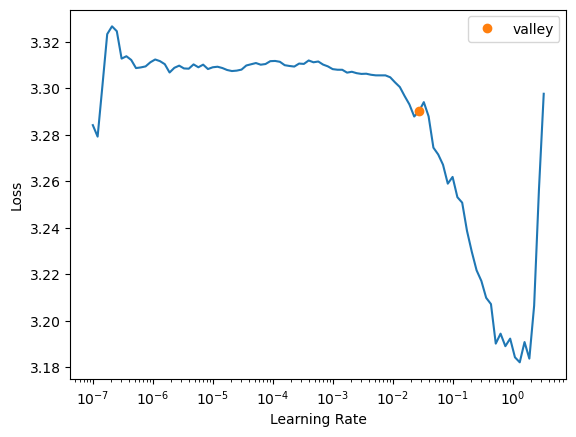

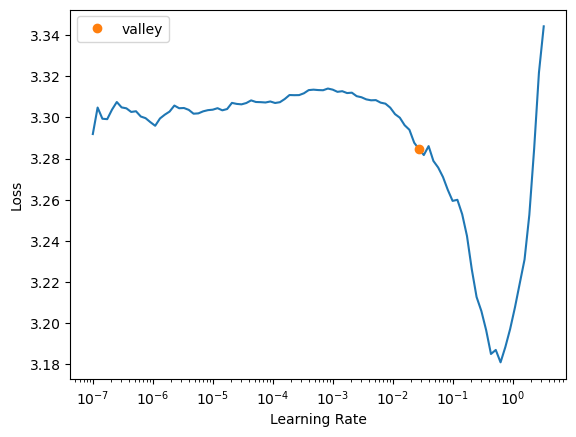

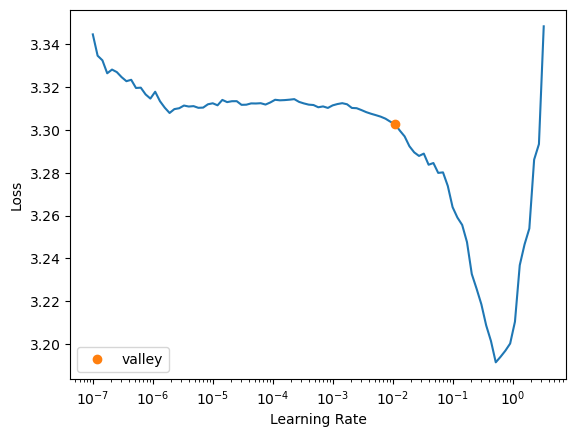

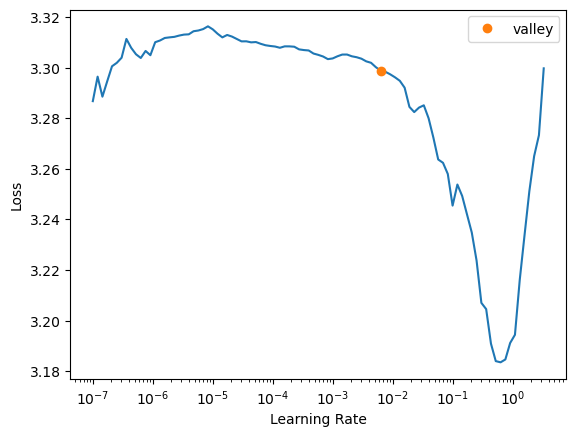

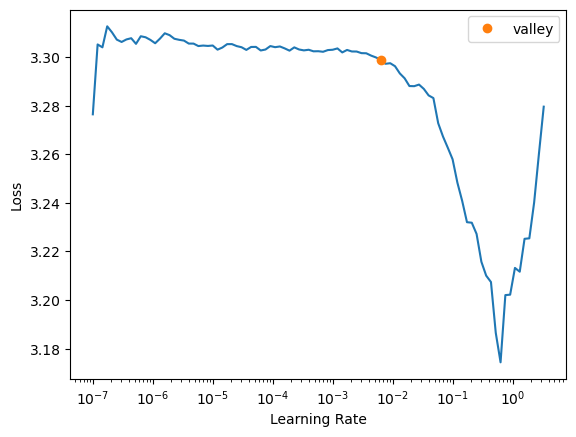

In [135]:
train_val = train_validate(dls,m,epoch=25,metrics=squeeze_accuracy,loss=squeeze_cross_entropy)

### Load Test Data

In [136]:
test_log = import_log(f'data/csv/PDC2020_ground_truth/{log_name}.csv.gz')
test_log[test_log['normal'] == False].head(50)

,activity,trace_id,case:pdc:costs,normal,event_id
trace_id,,,,,
trace 4,###start###,trace 4,5.0,False,0
trace 4,t26,trace 4,5.0,False,1
trace 4,t32,trace 4,5.0,False,2
trace 4,t41,trace 4,5.0,False,3
trace 4,t44,trace 4,5.0,False,4
trace 4,t33,trace 4,5.0,False,5
trace 4,t23,trace 4,5.0,False,6
trace 4,t31,trace 4,5.0,False,7
trace 4,t41,trace 4,5.0,False,8


### Create PPOBJ of test data with same vocab

In [137]:
#export
def process_test(test_log,categorify,cat_names='activity'):
    o=PPObj(test_log,procs=categorify,cat_names=cat_names,y_names=cat_names,do_setup=False)
    o.process() # map to the same categories as in the training set
    return o


In [164]:
o = process_test(test_log,categorify)

### Apply Prediction Model

In [165]:
#export
def predict_next_step(o,m,ws=5):
    wds,idx=partial(windows_fast,ws=ws)(o.xs, o.event_ids)
    res=(m(LongTensor(wds).cuda()))
    return res,idx

In [166]:
nsp,idx=predict_next_step(o,m)

### Calculate Anomaly Score

In [167]:
def calc_anomaly_score(res,o,idx):
    sm = nn.Softmax(dim=1)
    y = o.items['activity'].iloc[idx].values
    p = sm(res)
    pred = p.max(1)[0]
    truth = p[list(range(0, len(y))),y]
    a_score = ((pred - truth) / pred).cpu().detach().numpy()
    return a_score

In [168]:
anomaly_score = calc_anomaly_score(nsp,o,idx)

# Experiment (Rom)

In [169]:
df = o.xs
grouper = df.groupby('trace_id')
grouped = grouper.apply(lambda x: x['activity'].values)
print(grouped)

trace_id
trace 1                                                                                                                                                      [2, 3, 8, 6, 13, 11, 14, 10, 5, 9, 6, 12, 14, 4, 16, 3, 8, 22, 13, 15, 18, 23, 26, 1]
trace 10                                                                                                                                          [2, 3, 7, 13, 15, 23, 24, 6, 19, 14, 16, 9, 4, 21, 7, 13, 15, 26, 18, 23, 24, 19, 15, 18, 23, 1]
trace 100                                                     [2, 3, 7, 13, 6, 9, 4, 3, 14, 7, 13, 16, 9, 21, 25, 20, 16, 4, 3, 8, 13, 21, 15, 17, 23, 24, 19, 15, 9, 4, 7, 13, 15, 23, 24, 19, 15, 23, 24, 19, 15, 18, 23, 24, 19, 15, 17, 23, 1]
trace 1000                                                                           [2, 3, 8, 13, 6, 11, 15, 18, 23, 14, 16, 24, 19, 15, 21, 23, 26, 25, 20, 16, 21, 26, 20, 10, 5, 6, 11, 14, 10, 5, 6, 11, 14, 10, 5, 6, 11, 14, 16, 22, 26, 1]
trace 101          

In [170]:
y = o.items['activity'].iloc[idx].values
print(y)

[ 3  8  6 ... 22 26  1]


## Return o.xs

In [171]:
df2 = pd.DataFrame(grouped.explode())
df2.reset_index(inplace=True)

# Rename the columns
df2.columns = ['trace_id', 'activity']

# Set 'trace_id' as the index
df2.set_index('trace_id', inplace=True)

o.xs = df2

ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
nsp,idx=predict_next_step(o,m)

### Classify Anomalies based of Threshhold, get predictions and ground truth, compute a few metrics

In [30]:
def get_anomalies(a_score,o,idx,threshhold=0.98):
    df=pd.DataFrame(columns=['a_score'])
    df['a_score'] = a_score
    df['trace_id'] = o.items.iloc[idx]['trace_id'].values
    df['normal'] = o.items.iloc[idx]['normal'].values
    df

    y_true = (df.loc[df.trace_id.drop_duplicates().index].normal==False).tolist()
    cases = df.loc[df.trace_id.drop_duplicates().index].trace_id.tolist()
    anomalies = set(list(df.loc[df['a_score'] > threshhold]['trace_id']))
    y_pred=[case in anomalies for case in cases]
    return y_pred,y_true

In [31]:
y_pred, y_true = get_anomalies(anomaly_score,o,idx)

In [105]:
print(len(y_pred),len(y_true))

1000 1000


In [102]:
f1_score(y_true, y_pred)

0.8538461538461538

In [33]:
accuracy_score(y_true, y_pred)

0.848

In [34]:
precision_score(y_true,y_pred)

0.751269035532995

In [35]:
recall_score(y_true,y_pred)

0.9888641425389755

# A little order

In [202]:
import random
random.seed(0)

o = process_test(test_log,categorify)

column_name = 'activity'
probability_of_change = 0.01
mask = np.random.rand(len(o[column_name])) < probability_of_change
random_values = np.random.randint(2, 3, size=np.sum(mask))
o.loc[mask, column_name] = random_values

print(o)

            activity    trace_id case:pdc:costs normal event_id
trace_id                                                       
trace 1            2     trace 1            0.0   True        0
trace 1            3     trace 1            0.0   True        1
trace 1            8     trace 1            0.0   True        2
trace 1            6     trace 1            0.0   True        3
trace 1           13     trace 1            0.0   True        4
...              ...         ...            ...    ...      ...
trace 1000        14  trace 1000            2.0  False       37
trace 1000        16  trace 1000            2.0  False       38
trace 1000        22  trace 1000            2.0  False       39
trace 1000        26  trace 1000            2.0  False       40
trace 1000         1  trace 1000            2.0  False       41

[30095 rows x 5 columns]


In [203]:
nsp,idx=predict_next_step(o,m)
anomaly_score = calc_anomaly_score(nsp,o,idx)
y_pred, y_true = get_anomalies(anomaly_score,o,idx)
print(f1_score(y_true, y_pred))

0.7765118317265557


### Get NSP Accuracy on Inrference


In [36]:
#export
#nsp is the next step prediction
def nsp_accuracy(o,idx,nsp):
    nsp_y=o.ys.iloc[idx]
    nsp_acc= accuracy(nsp,tensor(nsp_y.values).cuda())
    return nsp_acc

In [37]:
nsp_accuracy(o,idx,nsp)

TensorBase(0.5023, device='cuda:0')

## Multivariate Anomaly Detection

Rewrite the prediction model to support multivariate prediction. Define attr_dict that maps event log to considerable attributes. Dynamically adapt preprocessing, network architecture, loss function, and anomaly score computation

In [38]:
#export
attr_dict={}
for i in [i for i in glob.glob('data/csv/binet_logs/*')]:
    if 'bpic12'in i:
        attr_dict[i] =['activity']
    elif 'bpic13' in i:
        attr_dict[i]=['activity','org:group',
'org:resource', 'org:role', 'organization country', 'product', 'resource country','impact']
    elif 'bpic17' in i:  
        attr_dict[i]=['activity','EventOrigin','org:resource']
    elif 'bpic15' in i:
        attr_dict[i]=['activity', 'action_code', 'activityNameEN', 'activityNameNL','monitoringResource', 'org:resource', 'question']
    elif '-1.' in i:
        attr_dict[i]=['activity','user']
    elif '-2.' in i:
        attr_dict[i]=['activity','user','day']
    elif '-3.' in i:
        attr_dict[i]=['activity','user','day','country']
    elif '-4.' in i:
        attr_dict[i]=['activity','user','day','country','company']

In [39]:
#export
def get_attr(attr_dict,log_name):
    if log_name in attr_dict: 
        return attr_dict[log_name]
    else: return ['activity']

### Load Event Log:

In [40]:
log_name= 'medium-0.3-4'

In [41]:
fn=f'data/csv/binet_logs/{log_name}.csv.gz'

In [42]:
cols= get_attr(attr_dict,fn)
cols

['activity']

In [43]:
log = import_log(fn,cols)
log.head()

,activity,timestamp,timestamp_end,anomaly,trace_id,company,country,day,user,event_id
trace_id,,,,,,,,,,
1,###start###,NaN,NaN,Rework,1,Codehow,Comoros,Wednesday,Wilton,0
1,Activity A,NaN,NaN,Rework,1,Codehow,Comoros,Wednesday,Wilton,1
1,Activity Z,NaN,NaN,Rework,1,Plussunin,Chad,Tuesday,Iluminada,2
1,Activity AA,NaN,NaN,Rework,1,year-job,Libyan Arab Jamahiriya,Wednesday,Sandra,3
1,Activity AF,NaN,NaN,Rework,1,Donquadtech,Cocos (Keeling) Islands,Friday,Ling,4


In [44]:
cols[0]

'activity'

### Create Training Data Loaders and Vocab:

In [45]:
o,dls,categorify = training_dl(log,cols)

In [46]:
xcat,ycat = dls.one_batch()

In [47]:
xcat.shape

torch.Size([32, 1, 5])

In [48]:
ycat[0]

tensor([ 1, 10,  3, 17, 10, 10,  5, 11,  5, 12, 10,  5, 30, 20, 10,  5,  4,  3,
         5,  3,  3,  1, 27,  1, 23, 34,  1,  1, 10,  1,  4, 10],
       device='cuda:0')

In [49]:
#export
from fastai.tabular.model import get_emb_sz # get embedding size

### Create Multivariate Prediction Model
Todo: support continuous attributes

In [50]:
emb_szs = get_emb_sz(o) # get embedding size

In [51]:
#export
class MultivariateModel(torch.nn.Module) :
    def __init__(self, emb_szs, lstm_neurons=25,lstm_layers=2) :
        super().__init__()
        
        self.embeds = nn.ModuleList([Embedding(ni, nf) for ni,nf in emb_szs])
        self.lstms = nn.ModuleList([nn.LSTM(nf, lstm_neurons, batch_first=True, num_layers=lstm_layers) 
                                    for ni,nf in emb_szs])
        self.linears = nn.ModuleList([nn.Linear(lstm_neurons, ni) for ni,nf in emb_szs])

        

    def forward(self, xcat):
        res=[]
        for i in range(xcat.shape[1]):
            x =xcat[:,i]
            x =self.embeds[i](x)
            x,_ =self.lstms[i](x)
            x = x[:,-1]
            x= self.linears[i](x)
            res.append(x)
        return tuple(res)
    


In [52]:
m=MultivariateModel(emb_szs)
pred = m(xcat.cpu())

### Define Multi-Loss and -Metrics

In [53]:
#export
def _accuracy_idx(a,b,i): return accuracy(listify(a)[i],listify(b)[i])

def get_metrics(o):
    
    number_cats=len(o.ycat_names)
    
    accuracies=[]
    for i in range(number_cats):
        accuracy_func=partial(_accuracy_idx,i=i)
        accuracy_func.__name__= f"acc_{o.ycat_names[i]}"
        accuracy_func=AvgMetric(accuracy_func)
        accuracies.append(accuracy_func)
    mae_days=None
    return L(accuracies)+mae_days

def multi_loss_sum(o,p,y):
    '''Multi Loss function that sums up multiple loss functions. The selection of the loss function is based on the PPObj o'''
    p,y=listify(p),listify(y)
    len_cat,len_cont=len(o.ycat_names),len(o.ycont_names)
    cross_entropies=[F.cross_entropy(p[i],y[i]) for i in range(len_cat)]
    return torch.sum(torch.stack(list(L(cross_entropies))))

def my_loss(p,y): return F.cross_entropy(p[0],y[0])
def my_metric(p,y): return accuracy(p[0],y[0])

In [54]:
loss=partial(multi_loss_sum,o)

In [55]:
loss(pred,[i.cpu() for i in ycat])

tensor(4.2192, grad_fn=<SumBackward0>)

### Training of the prediction network
Todo: Rename the Metric Columns

In [56]:
epoch=25
train_val=train_validate(dls,m,loss=loss,metrics=get_metrics(o),epoch=epoch,show_plot=False)


epoch,train_loss,valid_loss,_accuracy_idx,time
0,2.918148,2.865427,0.146359,00:08
1,1.421537,1.335839,0.695386,00:07
2,0.981461,0.965541,0.742970,00:07
3,0.835241,0.836984,0.765681,00:08
4,0.783576,0.771399,0.781543,00:07
5,0.766380,0.744798,0.787311,00:07
6,0.689995,0.718853,0.791276,00:07
7,0.693695,0.711058,0.782985,00:07
8,0.648308,0.689069,0.788392,00:07
9,0.639150,0.681740,0.796683,00:07


Better model found at epoch 0 with valid_loss value: 2.865427017211914.
Better model found at epoch 1 with valid_loss value: 1.3358389139175415.
Better model found at epoch 2 with valid_loss value: 0.9655407071113586.
Better model found at epoch 3 with valid_loss value: 0.8369837403297424.
Better model found at epoch 4 with valid_loss value: 0.7713987231254578.
Better model found at epoch 5 with valid_loss value: 0.744797945022583.
Better model found at epoch 6 with valid_loss value: 0.7188529372215271.
Better model found at epoch 7 with valid_loss value: 0.7110580205917358.
Better model found at epoch 8 with valid_loss value: 0.6890693306922913.
Better model found at epoch 9 with valid_loss value: 0.6817404627799988.
Better model found at epoch 11 with valid_loss value: 0.6804460883140564.
Better model found at epoch 12 with valid_loss value: 0.6782880425453186.
Better model found at epoch 13 with valid_loss value: 0.6730236411094666.
Better model found at epoch 14 with valid_loss val

Better model found at epoch 0 with valid_loss value: 0.8011192679405212.


### Load Test Log for Inference

In [57]:
log = import_log(fn,cols)
log.head()
o = process_test(log,categorify,cols)

In [58]:
#export
def predict_next_step(o,m,ws=5):
    wds,idx=partial(windows_fast,ws=ws)(o.xs, o.event_ids)
    res= []
    with torch.no_grad():
        for b in DataLoader(wds,bs=8*1024,shuffle=False):
            h= m(b.long().cuda())
            h= tuple([i.cpu() for i in h])
            res.append(h)

    res =tuple([torch.cat([k[i] for k in res] ) for i in range(len(o.cat_names))])
    return res,idx

In [59]:
%%timeit
res,idx=predict_next_step(o,m)


313 ms ± 52.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Compute Anomaly Score

In [60]:
#export
def multivariate_anomaly_score(res,o,idx,cols):
    score_df=pd.DataFrame()

    for cidx,_ in enumerate(cols):
        sm = nn.Softmax(dim=1)
        p = sm(res[cidx].cpu())
        pred = p.max(1)[0]
        y = o.items[cols[cidx]].iloc[idx].values

        truth=p[list(range(len(y))),y]
        score = ((pred - truth) / pred).tolist()
        score_df[cols[cidx]] = score
    score_df['trace_id']=o.items['trace_id'].iloc[idx].values
    return score_df

In [61]:
score_df=multivariate_anomaly_score(res,o,idx,cols)
score_df

NameError: name 'res' is not defined

### Anomaly Classification

We can set a fixed threshold or define a custom threshold function. Currently only fixed threshold is used.

In [ ]:
#export
def get_thresholds(col,act_threshold=0.964,attr_threshold=0.9971):
    """
    Defines a custom threshold function
    """
    if col =='activity':
        return act_threshold
    else: 
        return attr_threshold

In [ ]:
#export
def multivariate_anomalies(score_df,cols,idx,o,anomaly_col='normal',fixed_threshold=None,get_thresholds=get_thresholds):
    if fixed_threshold is None:
        comp_thresholds=get_thresholds
    else:
        comp_thresholds = lambda _: fixed_threshold
    a=[score_df.loc[score_df[c] >= comp_thresholds(c)]['trace_id'] for c in cols]
    anomalies=list(set().union(*a))
    h=o.items.iloc[idx][anomaly_col]
    if anomaly_col=='anomaly':
        score_df['is_anomaly']=(h!='normal').tolist()
    else:
        score_df['is_anomaly']=(h==False).tolist()
    score_df['anomaly']=h.tolist()
    y_true = (score_df.loc[score_df.trace_id.drop_duplicates().index].is_anomaly).tolist()
    cases = score_df.loc[score_df.trace_id.drop_duplicates().index].trace_id.tolist()
    y_pred=[case in anomalies for case in cases]
    return y_true,y_pred

In [ ]:
y_true,y_pred=multivariate_anomalies(score_df,cols,idx,o,fixed_threshold=None,anomaly_col='anomaly')

In [104]:
print(len(y_true))

1000


In [ ]:
f1_score(y_true, y_pred)

In [ ]:
k=o.items.groupby(o.items.index)['anomaly'].last().iloc[np.where(~np.equal(y_pred, y_true))[0]
]
k.value_counts()

In [ ]:
o.items.groupby(o.items.index)['anomaly'].last().value_counts()

## Plot Anomaly Scores for a Trace

In [ ]:
score_df


In [ ]:
score_df.groupby(['trace_id']).size().drop_duplicates().sort_values()

In [ ]:
score_df['event_id']=score_df.groupby('trace_id').cumcount()

plot_data=score_df.melt(value_vars=['activity','user','day','country','company'],value_name='Anomaly Score',var_name='Attribute',id_vars=['trace_id','anomaly','event_id'])
plot_data['event_id']=plot_data.groupby('trace_id').cumcount()
plot_data

In [ ]:
import seaborn as sns

In [ ]:
data=plot_data[plot_data['trace_id']==6].copy()
data['xticks']= [f'e{y+1}' for x in range(5) for y in range(len(data)//5)]
print(len(data))
print(data['anomaly'].iloc[0])
print(data['trace_id'].iloc[0])
times = data.event_id.unique()
g = sns.FacetGrid(data, col="trace_id", hue="Attribute",
                  palette="Set3", height=4, aspect=2)
g.map(sns.barplot, 'event_id', 'Anomaly Score', order=times)
g.add_legend()
ax1 = g.axes[0][0]
g.set_titles(col_template="", row_template="")
g.set_axis_labels('')

ax1.axhline(0.98, ls='--')
for ax in g.axes.flat:
  
    ax.set_xticklabels([f'e{y+1}' for x in range(5) for y in range(len(data)//5)], rotation=40,fontsize=9) # set new labels
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [ ]:
def plot_anomaly_scores(trace_id):
    data=plot_data[plot_data['trace_id']==trace_id]
    print(len(data))
    print(data['anomaly'].iloc[0])
    print(data['trace_id'].iloc[0])
    times = data.event_id.unique()
    g = sns.FacetGrid(data, col="trace_id", hue="Attribute",
                      palette="Set3", height=4, aspect=2)
    g.map(sns.barplot, 'event_id', 'Anomaly Score', order=times)
    g.add_legend()
    ax1 = g.axes[0][0]
    g.set_titles(col_template="", row_template="")
    g.set_axis_labels('')
    ax1.axhline(0.98, ls='--')
    for ax in g.axes.flat:

        ax.set_xticklabels([f'e{y+1}' for x in range(5) for y in range(len(data)//5)], rotation=50,fontsize=11) # set new labels
    plt.show()

In [ ]:
plot_anomaly_scores(1)

In [ ]:
plot_anomaly_scores(6)